In [21]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)

In [10]:
columns_to_keep = [
    "Crash Date", "Crash Time",
    "Road Description", "System Code",
    "Road Condition", "Latitude", "Longitude",
    "Weather Condition", "Lighting Conditions",
     "TU-1 Speed Limit", "TU-2 Speed Limit",
    "TU-1 Alcohol Suspected", "TU-2 Alcohol Suspected",
    "Injury 00", "Injury 01", "Injury 02", "Injury 03", "Injury 04"
]

In [4]:
file_1='/content/drive/MyDrive/Dataset/CDOTRM_CD_Crash_Listing_-_2021.xlsx'
file_2='/content/drive/MyDrive/Dataset/CDOTRM_CD_Crash_Listing_-_2022.xlsx'
file_3='/content/drive/MyDrive/Dataset/CDOTRM_CD_Crash_Listing_-_2023.xlsx'
file_4='/content/drive/MyDrive/Dataset/CDOTRM_CD_Crash_Listing_-_2024.xlsx'

In [5]:
file_paths = [file_1,file_2, file_3,file_4]

In [11]:
df_list = []
for file in file_paths:
    df_file = pd.read_excel(file, usecols=columns_to_keep)
    df_list.append(df_file)


In [12]:
df = pd.concat(df_list, ignore_index=True)

In [14]:
df.to_excel("/content/drive/MyDrive/Dataset/merged_data.xlsx", index=False)

In [15]:
df = pd.read_excel("/content/drive/MyDrive/Dataset/merged_data.xlsx")

In [16]:
df.head()

,System Code,Crash Date,Crash Time,Latitude,Longitude,Road Description,Injury 00,Injury 01,Injury 02,Injury 03,Injury 04,Road Condition,Lighting Conditions,Weather Condition,TU-1 Speed Limit,TU-2 Speed Limit,TU-1 Alcohol Suspected,TU-2 Alcohol Suspected
0,State Highway,2021-01-01,00:00:00,39.52549,-107.32253,Intersection Related,5,0,0,0,0,Snowy,Daylight,Snow,35,0,NaN,No - Observed
1,County Road,2021-01-01,00:05:00,NaN,NaN,Non-Intersection,1,0,0,0,0,Icy,Dark – Unlighted,Clear,35,0,NaN,NaN
2,City Street,2021-01-01,00:17:00,39.82885,-105.04402,Non-Intersection,0,0,0,0,0,Dry,Dark – Unlighted,Clear,25,25,NaN,NaN
3,City Street,2021-01-01,00:25:00,39.70461,-105.01356,Non-Intersection,0,0,0,0,0,Dry,Dark – Unlighted,Clear,30,30,NaN,NaN
4,County Road,2021-01-01,00:26:00,NaN,NaN,Intersection Related,0,0,0,0,0,Dry,Dark – Unlighted,Clear,35,0,NaN,NaN


In [17]:
df.shape

(388255, 18)

In [18]:
df.columns


Index(['System Code', 'Crash Date', 'Crash Time', 'Latitude', 'Longitude',
       'Road Description', 'Injury 00', 'Injury 01', 'Injury 02', 'Injury 03',
       'Injury 04', 'Road Condition', 'Lighting Conditions',
       'Weather Condition', 'TU-1 Speed Limit', 'TU-2 Speed Limit',
       'TU-1 Alcohol Suspected', 'TU-2 Alcohol Suspected'],
      dtype='object')

In [23]:
df['TU-1 Alcohol Suspected'].value_counts()

,count
TU-1 Alcohol Suspected,
No - Observed,252262
Yes - Observed,9845
No - Other Method,9159
Yes - SFST,7479
No - SFST,3076
Yes - Preliminary Breath Test,3033
Yes - Other Method,2714
Unknown,1760
No - Preliminary Breath Test,960


In [24]:
df['TU-2 Alcohol Suspected'].value_counts()

,count
TU-2 Alcohol Suspected,
No - Observed,222507
No - Other Method,4886
No - SFST,1543
No - Preliminary Breath Test,595
Yes - Observed,382
Yes - Preliminary Breath Test,319
Yes - SFST,230
Unknown,114
Yes - Other Method,95


In [25]:
#combining TU-1 Alcohol Suspected Column and TU-2 Alcohol Suspected column
def combine_alcohol_suspected(row):
    yes_values = ["Yes - Preliminary Breath Test", "Yes - Observed", "Yes - SFST", "Yes - Other Method"]
    # Set to "Yes" if either TU-1 or TU-2 indicates alcohol suspicion
    if (row["TU-1 Alcohol Suspected"] in yes_values) or (row["TU-2 Alcohol Suspected"] in yes_values):
        return "Yes"
    return "No"

In [26]:
df["Alcohol Suspected"] = df.apply(combine_alcohol_suspected, axis=1)

In [27]:
df = df.drop(["TU-1 Alcohol Suspected", "TU-2 Alcohol Suspected"], axis=1)

In [28]:
#Combining Speed limit columns
def combine_speed_limit(row):
    # Get the speed limits and ignore zeros
    speed1 = row["TU-1 Speed Limit"]
    speed2 = row["TU-2 Speed Limit"]

    # Find the maximum of the two, but ignore 0 values
    if speed1 > 0 and speed2 > 0:
        return max(speed1, speed2)
    elif speed1 > 0:
        return speed1
    elif speed2 > 0:
        return speed2
    else:
        return 0  # Default to 0 if both are missing or invalid


In [30]:
df["Speed Limit"] = df.apply(combine_speed_limit, axis=1)

In [31]:
def categorize_speed_limit(speed):
    if speed == 0:
        return "Unknown"
    elif 0 < speed <= 35:  # Low: 0–35 mph (city streets, residential)
        return "Low"
    elif 40 <= speed <= 55:  # Medium: 40–55 mph (urban highways, arterial roads)
        return "Medium"
    else:  # High: 60+ mph (interstates, major highways)
        return "High"

In [32]:
df["Speed Limit Category"] = df["Speed Limit"].apply(categorize_speed_limit)

In [33]:
df = df.drop(["TU-1 Speed Limit", "TU-2 Speed Limit", "Speed Limit"], axis=1)

<h1>Feature Engineering </h1>

In [36]:
#Converting Crash Date to datetime and creating Crash Hour, IsWeekday column, Day of the week
df["Crash Date"] = pd.to_datetime(df["Crash Date"], format="%Y-%m-%d")

df["Day of Week"] = df["Crash Date"].dt.day_name()

df["Crash Hour"] = pd.to_datetime(df["Crash Time"], format="%H:%M:%S").dt.hour

df["Is Weekday"] = df["Day of Week"].isin(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]).astype(int)


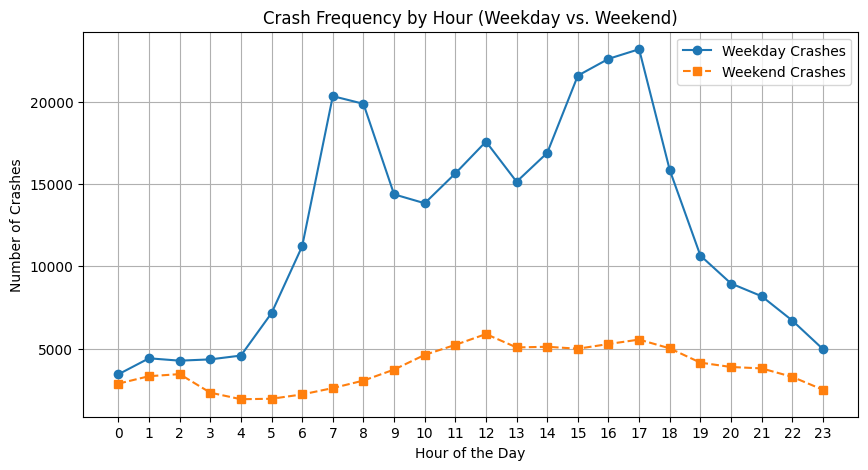

In [37]:
# To find the rush hour we are plotting weekday and weekend crashes
weekday_crashes = df[df["Is Weekday"] == 1].groupby("Crash Hour").size()
weekend_crashes = df[df["Is Weekday"] == 0].groupby("Crash Hour").size()
plt.figure(figsize=(10, 5))

# Weekday crashes
plt.plot(weekday_crashes.index, weekday_crashes.values, marker="o", linestyle="-", label="Weekday Crashes")

# Weekend crashes
plt.plot(weekend_crashes.index, weekend_crashes.values, marker="s", linestyle="--", label="Weekend Crashes")

# Labels and Title
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Crashes")
plt.title("Crash Frequency by Hour (Weekday vs. Weekend)")
plt.xticks(range(0, 24))  # Set x-axis to show all 24 hours
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

<b>Observations from the graph:</b>
1. Acccidents causes more in weekdays than weekends.
2. Rush Hours in weekdays- 7:00 AM- 10:00 AM, 3:00PM - 6:00PM
3. Rush Hours in weekends - 9:00AM-12:00AM, 4:00PM - 7:00PM

In [38]:
def is_rush_hour(row):
    if row["Is Weekday"] == 1:  # Only check rush hours on weekdays
        if (7 <= row["Crash Hour"] <= 10) or (15 <= row["Crash Hour"] <= 19):
            return 1  # Rush hour
    return 0  # Non-rush hour

In [39]:
#Creating rush hour column
df["Rush Hour"] = df.apply(is_rush_hour, axis=1)

In [40]:
#As we found the rish hour we longer need the crash Hour,Crash Date, Crash Time,Is Weekday
df = df.drop(["Day of Week", "Is Weekday", "Crash Hour", "Crash Date", "Crash Time"], axis=1)

In [41]:
df.head()

,System Code,Latitude,Longitude,Road Description,Injury 00,Injury 01,Injury 02,Injury 03,Injury 04,Road Condition,Lighting Conditions,Weather Condition,Alcohol Suspected,Speed Limit Category,Rush Hour
0,State Highway,39.52549,-107.32253,Intersection Related,5,0,0,0,0,Snowy,Daylight,Snow,No,Low,0
1,County Road,NaN,NaN,Non-Intersection,1,0,0,0,0,Icy,Dark – Unlighted,Clear,No,Low,0
2,City Street,39.82885,-105.04402,Non-Intersection,0,0,0,0,0,Dry,Dark – Unlighted,Clear,No,Low,0
3,City Street,39.70461,-105.01356,Non-Intersection,0,0,0,0,0,Dry,Dark – Unlighted,Clear,No,Low,0
4,County Road,NaN,NaN,Intersection Related,0,0,0,0,0,Dry,Dark – Unlighted,Clear,No,Low,0


In [42]:
def create_severity(row):
    if row["Injury 04"] >= 1:
        return "fatal"
    elif row["Injury 03"] >= 1:
        return "serious"
    else:
        return "slight"

In [43]:
df["Severity"] = df.apply(create_severity, axis=1)

In [44]:
df = df.drop(["Injury 00", "Injury 01", "Injury 02", "Injury 03", "Injury 04"], axis=1)

In [45]:
df.head()

,System Code,Latitude,Longitude,Road Description,Road Condition,Lighting Conditions,Weather Condition,Alcohol Suspected,Speed Limit Category,Rush Hour,Severity
0,State Highway,39.52549,-107.32253,Intersection Related,Snowy,Daylight,Snow,No,Low,0,slight
1,County Road,NaN,NaN,Non-Intersection,Icy,Dark – Unlighted,Clear,No,Low,0,slight
2,City Street,39.82885,-105.04402,Non-Intersection,Dry,Dark – Unlighted,Clear,No,Low,0,slight
3,City Street,39.70461,-105.01356,Non-Intersection,Dry,Dark – Unlighted,Clear,No,Low,0,slight
4,County Road,NaN,NaN,Intersection Related,Dry,Dark – Unlighted,Clear,No,Low,0,slight


In [46]:
print(df.isna().sum())

System Code                 6
Latitude                52961
Longitude               52959
Road Description           72
Road Condition           2003
Lighting Conditions      2262
Weather Condition        3598
Alcohol Suspected           0
Speed Limit Category        0
Rush Hour                   0
Severity                    0
dtype: int64


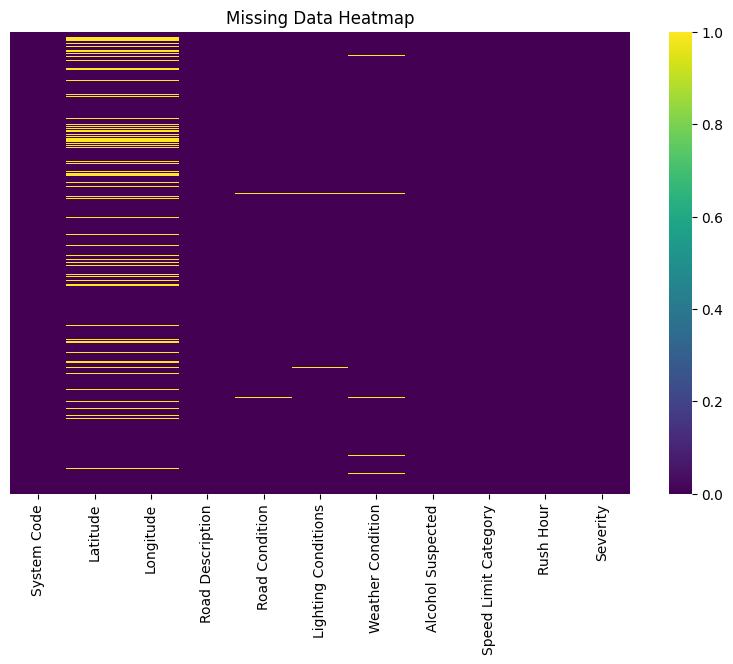

In [47]:
missing = df.isna()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(missing, cbar=True, cmap="viridis", yticklabels=False)
plt.title("Missing Data Heatmap")
plt.show()

In [48]:
df = df.dropna(subset=['System Code', 'Latitude', 'Longitude','Road Description','Lighting Conditions', 'Road Condition', 'Weather Condition'])


In [49]:
print(df.isna().sum())

System Code             0
Latitude                0
Longitude               0
Road Description        0
Road Condition          0
Lighting Conditions     0
Weather Condition       0
Alcohol Suspected       0
Speed Limit Category    0
Rush Hour               0
Severity                0
dtype: int64


In [50]:
df.to_excel("/content/drive/MyDrive/Dataset/Preprocessed_data.xlsx", index=False)